# COVID Government Response Paper Data Analysis

# TO DO:



- [ ] Continue to update this **[file](https://1drv.ms/x/s!AjWX5HOdYY23kf9x5S7g8LKLGlseVg?e=992nsi)** of data source locations 
- [ ] Figure out what to do about the negative values for case counts and death counts
- [ ] Continue to review the tutorial here [How to run a Zero-inflated Model with Random Effects](https://stats.idre.ucla.edu/sas/faq/how-do-i-run-a-random-effect-zero-inflated-poisson-model-using-nlmixed/)
- [ ] Figure out how to lag the case and death vars
- [ ] fill forward all of the control measures vars for all of the countries with data on these vars
- [ ] formalize the sensitivity analysis for the different thresholds for classifying SARS exp

### Completed:
- [X] Need to explore the missingness of the Oxford data. Sort the countries by GDP and examine what the missingness matrix looks like. **If you could run imputation on this data then you would have a major leg up on the other paper working on the similar topic. (on to of the other benefits to your paper)**

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =15 ,9
import numpy as np
import seaborn as sns
import datetime
from matplotlib.pyplot import figure
import os
from pathlib import Path
import shutil
import missingno as msno

In [2]:
data_path = '..\Modified Data Sets'
control_data_path = '..\Control Data'
graphics_path = '..\graphics'

In [4]:
from glob import glob

In [94]:
#importing main data set
df_path = glob(f'{data_path}\Final COVID Data Set (Through*.xlsx')[0]
df = pd.read_excel(df_path)
df = df.loc[(~df.date.isnull())]

#Creating data set to analyze missingness
no_dup = df.copy()
no_dup = no_dup.loc[~no_dup.case_count.isnull()]
no_dup['dup'] = no_dup.duplicated(['country'],keep='last')
miss_anal = no_dup.loc[~no_dup.dup]
miss_anal = miss_anal.loc[~miss_anal.quarantine_efficiency.isnull()]
#Creating dataset to analyze the overall trend
df_indexed = (df.groupby(by='date').sum()).filter(items=['case_count','death_count'])
df_indexed = df.set_index('date')

In [95]:
df.columns

Index(['country', 'countrycode', 'date', 'case_count', 'death_count',
       'school_close', 'domestic_travel', 'internat_travel', 'large_gather',
       'public_events', 'stay_home', 'gdp_rank', 'smoking_ihme_2019',
       'pop_2020', 'un_population_division_median_age_2017',
       'ages_65_and_above_of_total_population',
       'prevalence_hivaids_sex_both_age_15_49_years_percent',
       'deaths_hivaids_sex_both_age', 'diabetes_prev_ages_20_to_79',
       'deaths_smoking_sex_both_age_age_standardized_rate',
       'cancer_prevalence', 'htn_prevalence', 'copd_dalys_per_100000',
       'obesity_ihme_2019', 'country_vulnerability', 'emergency_preparedness',
       'gov_efficiency', 'quarantine_efficiency', 'total_score',
       'mers_case_count', 'sars_case_count', 'number_of_deathsa',
       'number_of_imported_cases', 'percent_of_imported_cases',
       'mers_sars_max', 'mers_sars_sum', 'mers_sars_exp1', 'mers_sars_exp5',
       'mers_sars_exp10', 'mers_sars_exp20'],
      dtype='ob

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60700 entries, 0 to 60741
Data columns (total 40 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   country                                              60700 non-null  object        
 1   countrycode                                          56094 non-null  object        
 2   date                                                 60700 non-null  datetime64[ns]
 3   case_count                                           49256 non-null  float64       
 4   death_count                                          49256 non-null  float64       
 5   school_close                                         60700 non-null  float64       
 6   domestic_travel                                      60700 non-null  float64       
 7   internat_travel                                      60700 non-null  float64       
 

> ### Evaluating Stationality

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# dftest = adfuller(df_indexed.case_count,autolag='AIC')
# dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'n'])
# for key,value in dftest[4].items():
#     dfoutput[f'Critical Value ({key})']= value
# print(dfoutput)

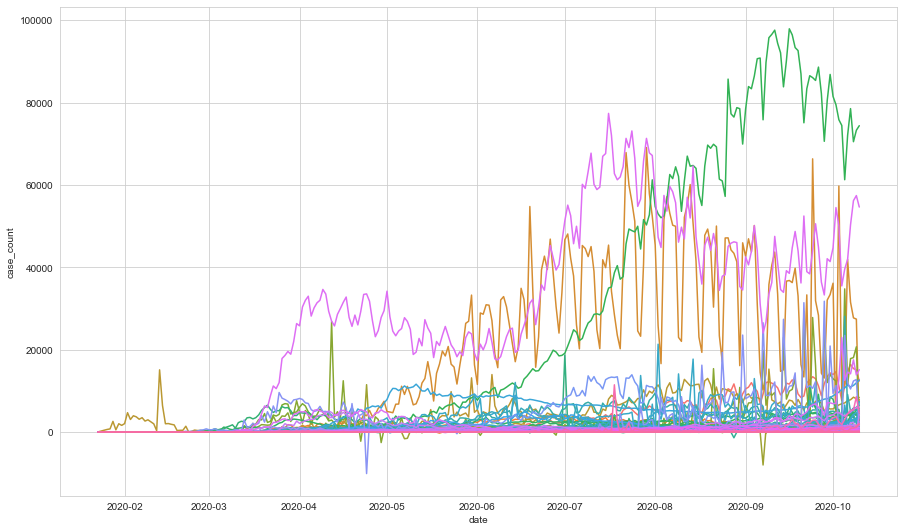

In [114]:
sns.lineplot(x = 'date', y ='case_count', hue = 'country', data = df,legend=False)

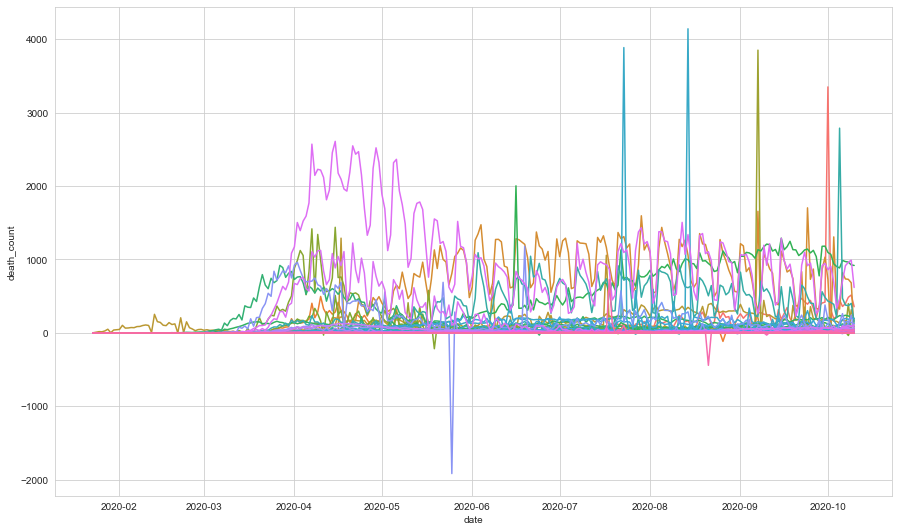

In [115]:
sns.lineplot(x = 'date', y ='death_count', hue = 'country', data = df,legend=False)

Text(0.5, 1.0, 'Global Case Count Rolling Mean & STD')

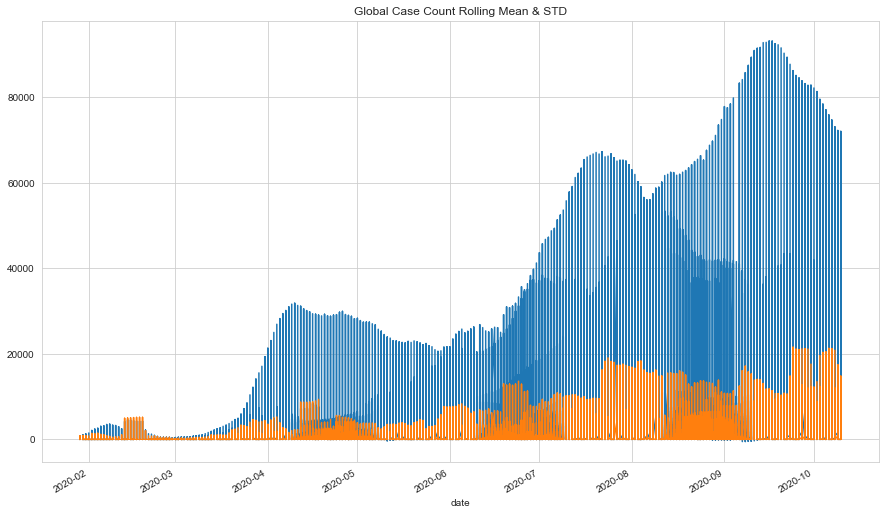

In [116]:
rolmean = df_indexed.case_count.rolling(window=7).mean()

rolstd = df_indexed.case_count.rolling(window=7).std()
rolmean.plot()
rolstd.plot()
plt.title('Global Case Count Rolling Mean & STD')

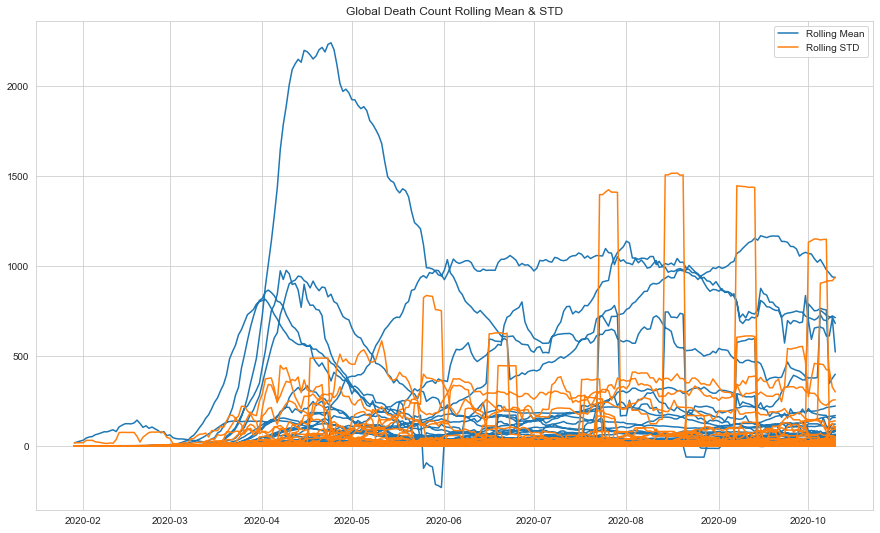

In [117]:
rolmean = df_indexed.death_count.rolling(window=7).mean()
rolstd = df_indexed.death_count.rolling(window=7).std()
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label='Rolling STD')
plt.legend(loc='best')
plt.title('Global Death Count Rolling Mean & STD')
plt.show()

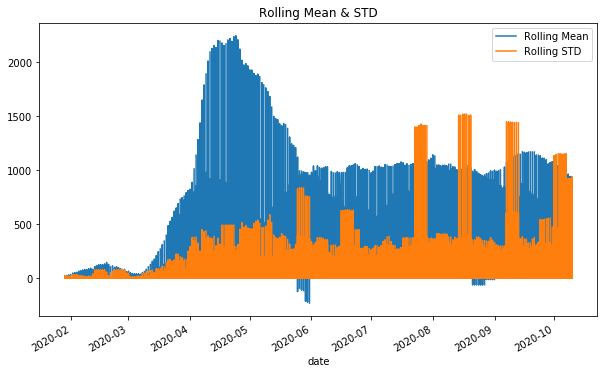

In [50]:
# rolmean = df_indexed.death_count.rolling(window=7).mean()

# rolstd = df_indexed.death_count.rolling(window=7).std()
# rolmean.plot( label='Rolling Mean')
# rolstd.plot( label='Rolling STD')

# # death = plt.plot(df_indexed.death_count, label = 'Death Counts')
# plt.legend(loc='best')
# plt.title('Rolling Mean & STD')
# # rolstd.plot()
# plt.show()

### Missingness Analysis

>> ##### Missingness Sorted by GDP Rank

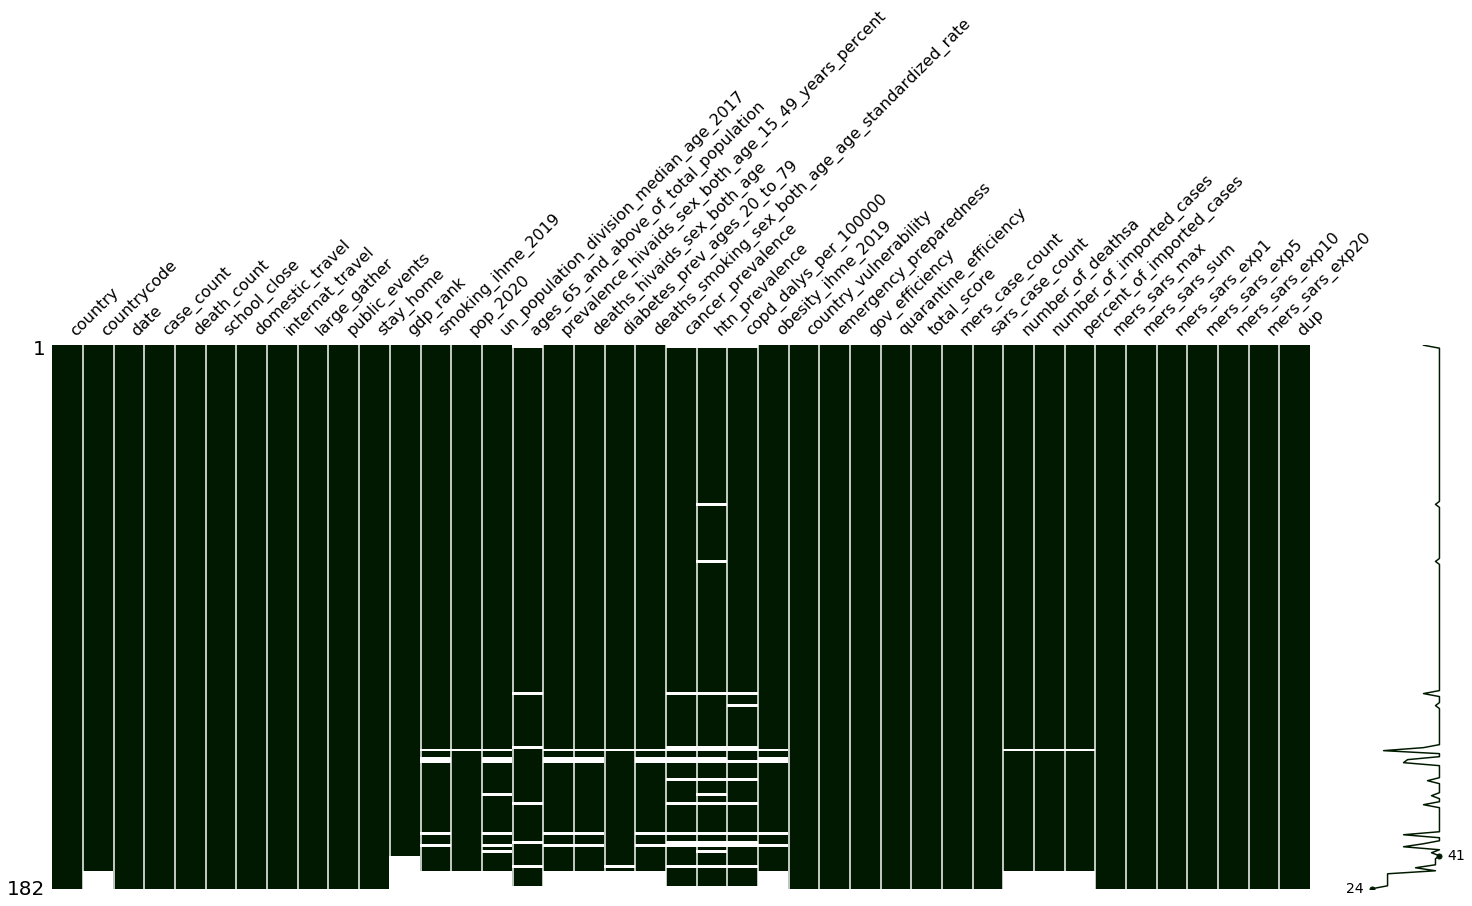

In [99]:
miss_anal.sort_values(by='gdp_rank',inplace=True)
df_nomiss = miss_anal.loc[~miss_anal.case_count.isnull()].copy()
msno.matrix(df_nomiss, color=(0.0, 0.10, 0.00))

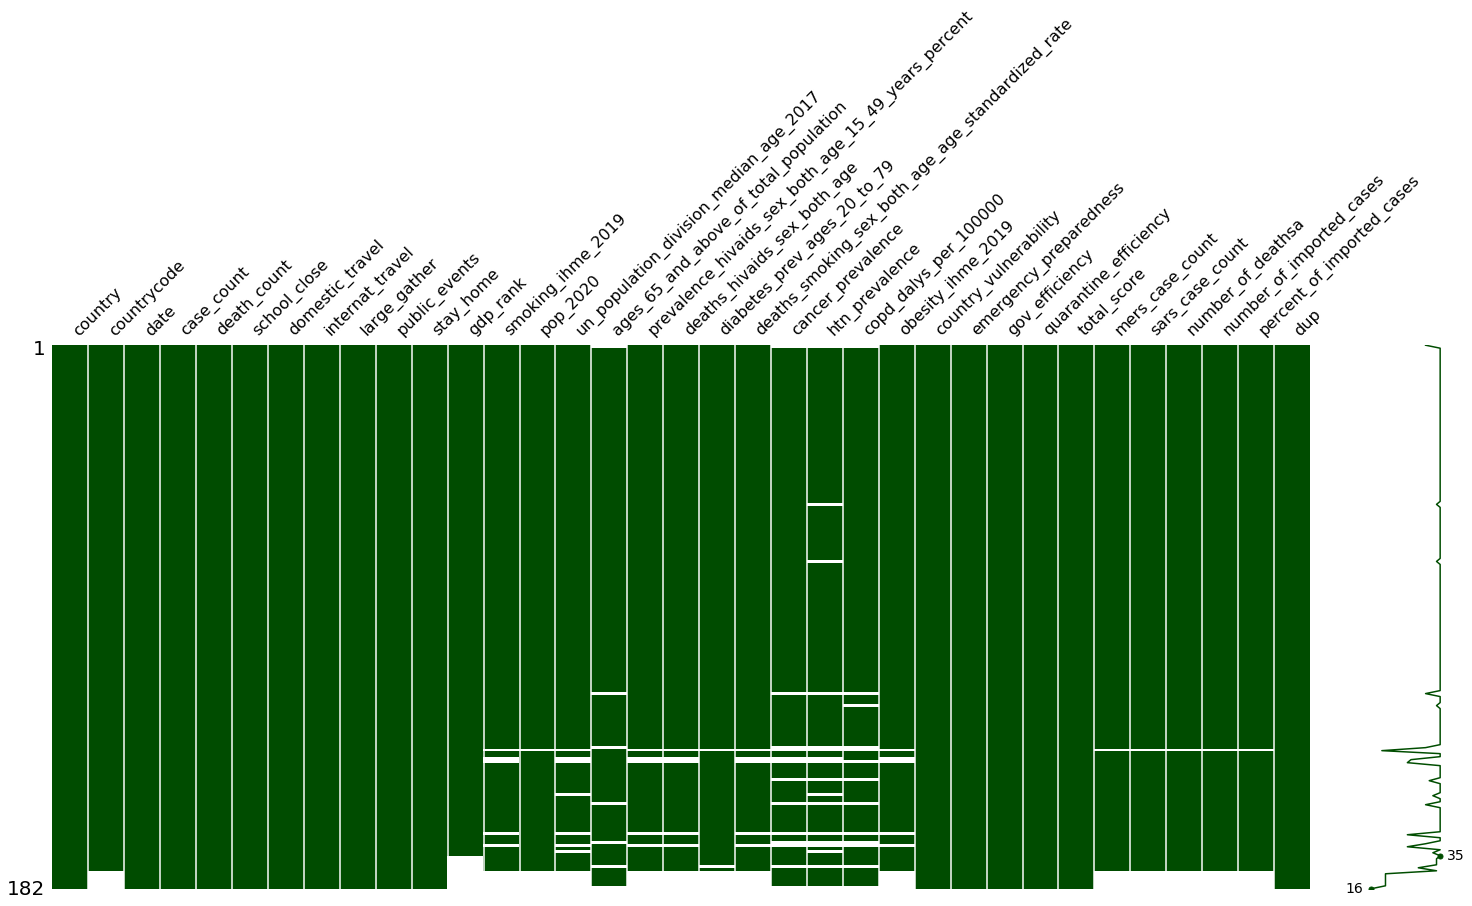

In [98]:
df_nomiss_cc = df_nomiss.loc[~df_nomiss.school_close.isnull()].copy()
msno.matrix(df_nomiss_cc, color=(0.0, 0.30, 0.00))


>> ##### Missingness Sorted by Population

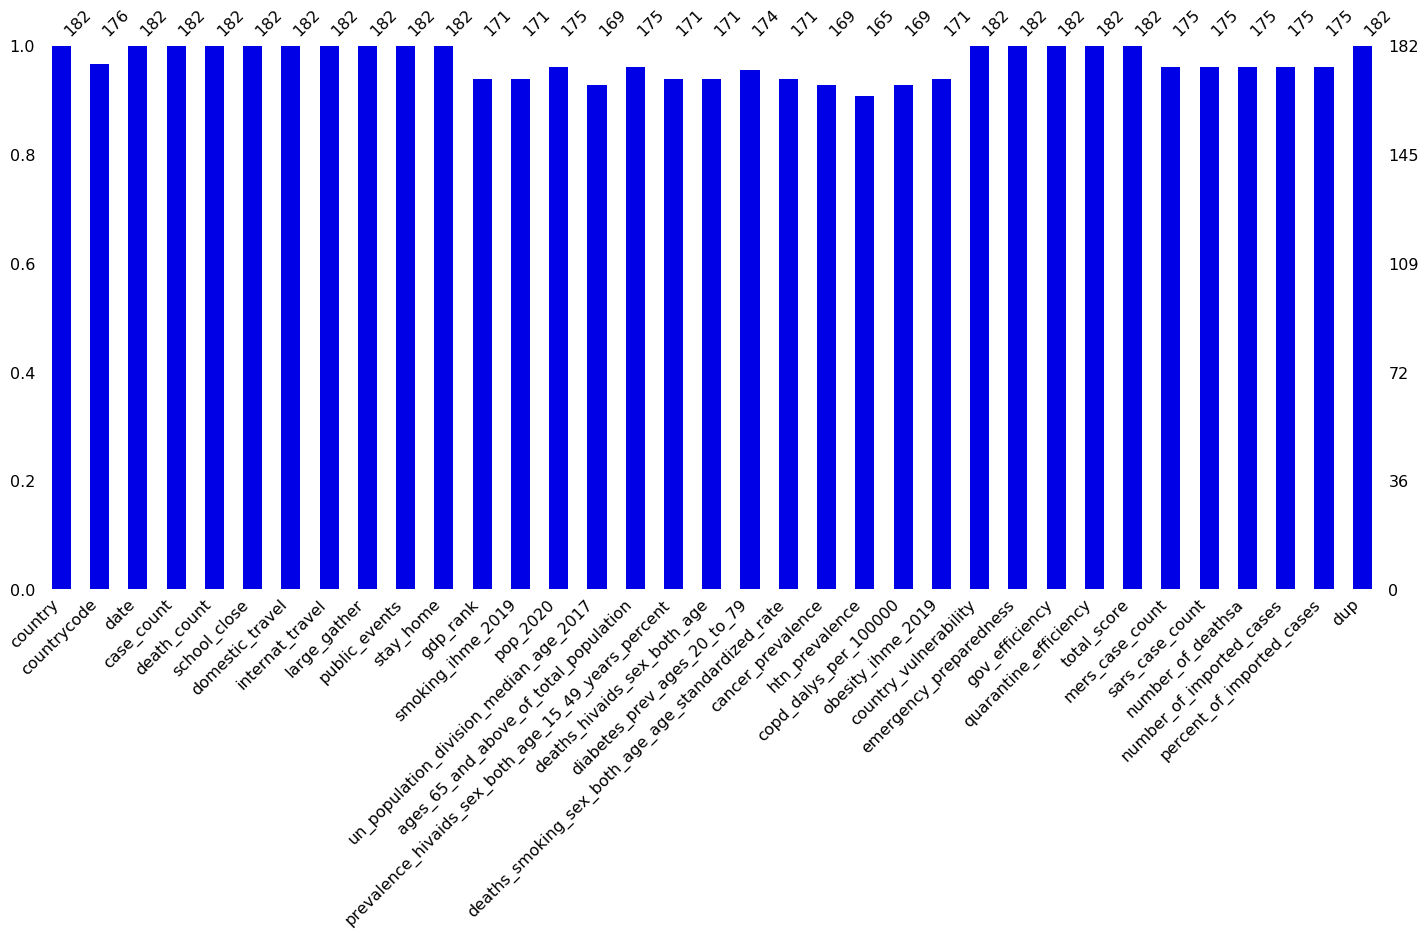

In [97]:
msno.bar(df_nomiss, color=(0.0, 0.00, 0.90))

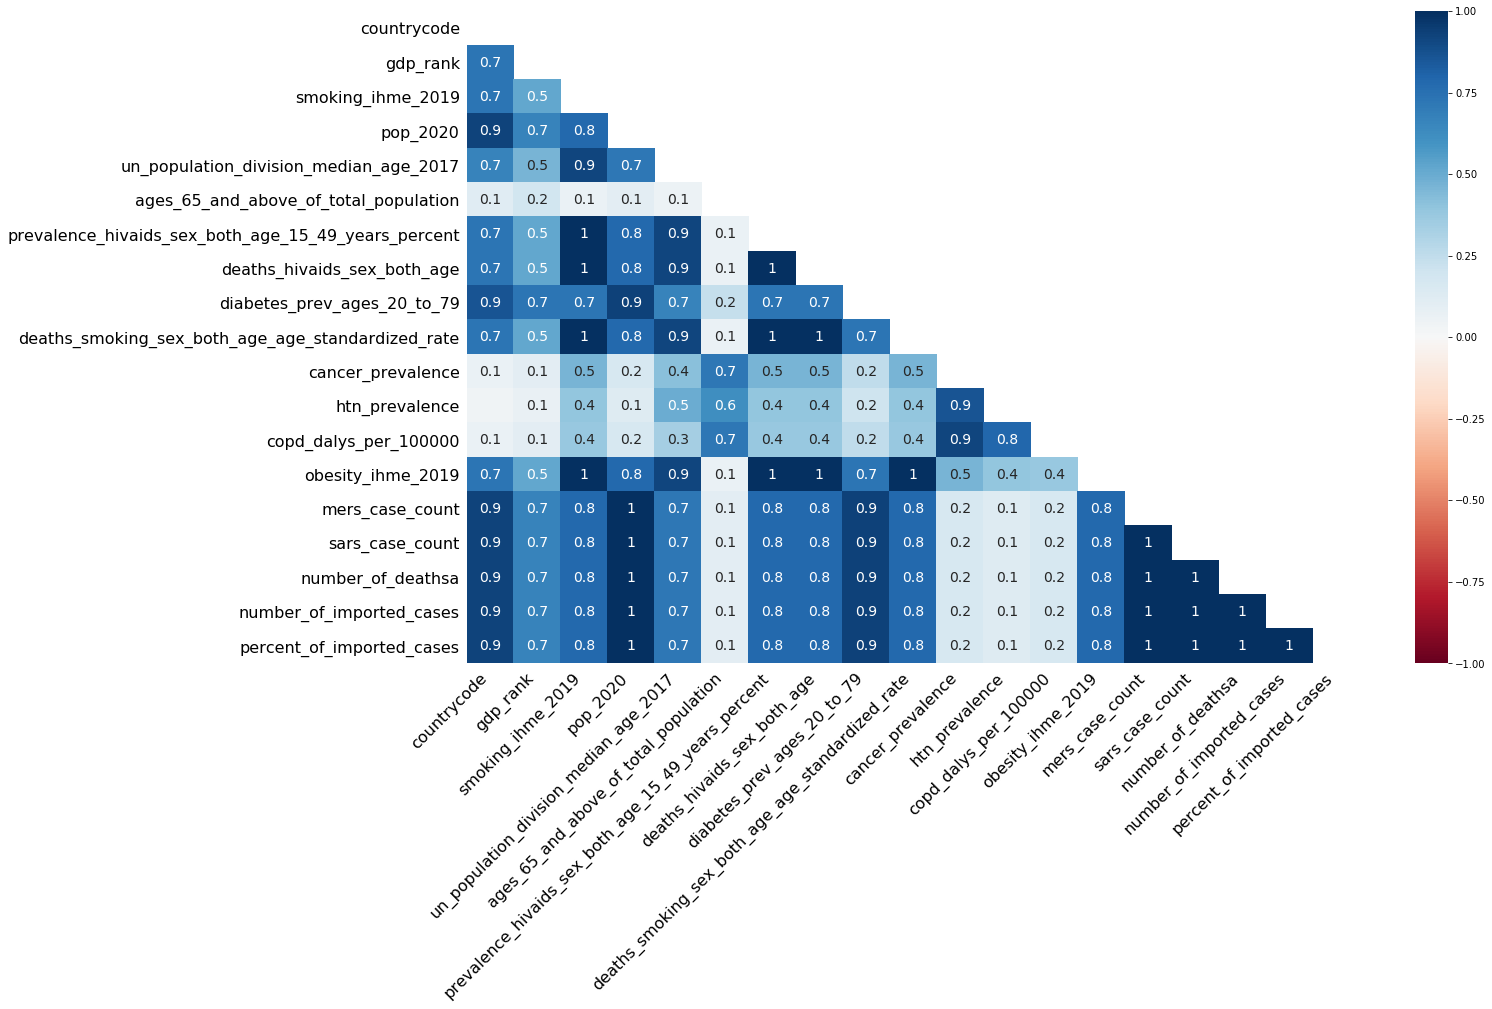

In [44]:
msno.heatmap(df_nomiss)

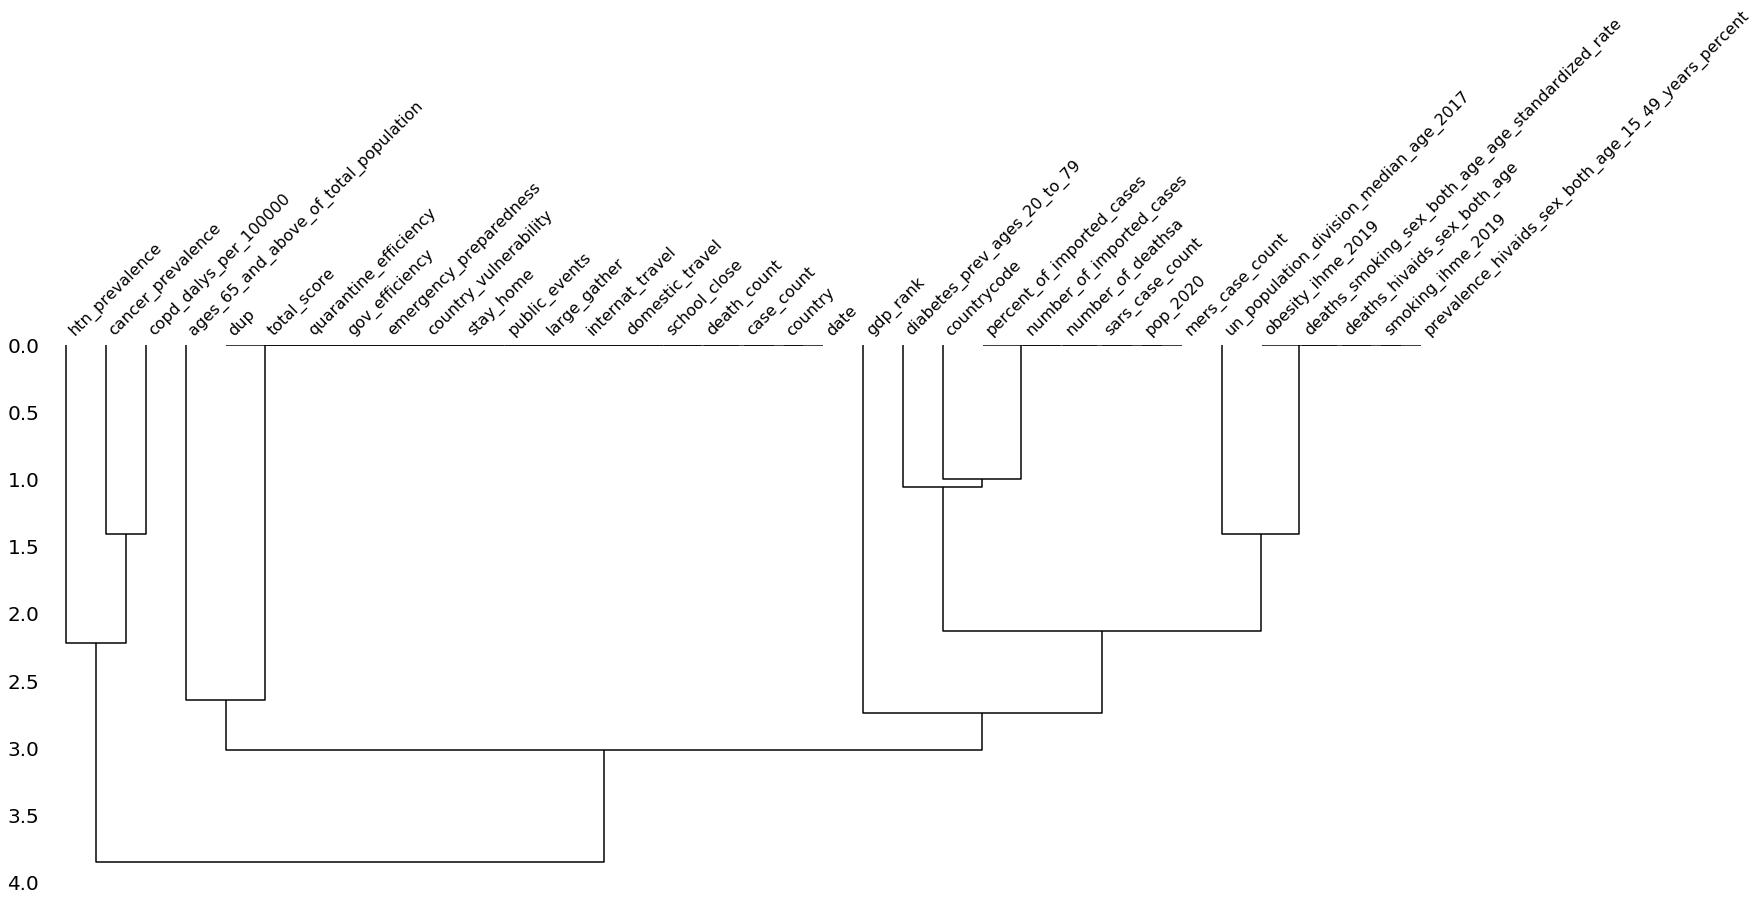

In [45]:
msno.dendrogram(df_nomiss)

## Descriptive Analysis

In [112]:
df.case_count.describe()

count    49256.000000
mean       754.826884
std       4626.421729
min     -10034.000000
25%          0.000000
50%          9.000000
75%        156.000000
max      97894.000000
Name: case_count, dtype: float64

In [118]:
df.death_count.describe()

count    49256.000000
mean        21.769713
std        124.286110
min      -1918.000000
25%          0.000000
50%          0.000000
75%          3.000000
max       4143.000000
Name: death_count, dtype: float64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60700 entries, 0 to 60741
Data columns (total 40 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   country                                              60700 non-null  object        
 1   countrycode                                          56094 non-null  object        
 2   date                                                 60700 non-null  datetime64[ns]
 3   case_count                                           49256 non-null  float64       
 4   death_count                                          49256 non-null  float64       
 5   school_close                                         60700 non-null  float64       
 6   domestic_travel                                      60700 non-null  float64       
 7   internat_travel                                      60700 non-null  float64       
 

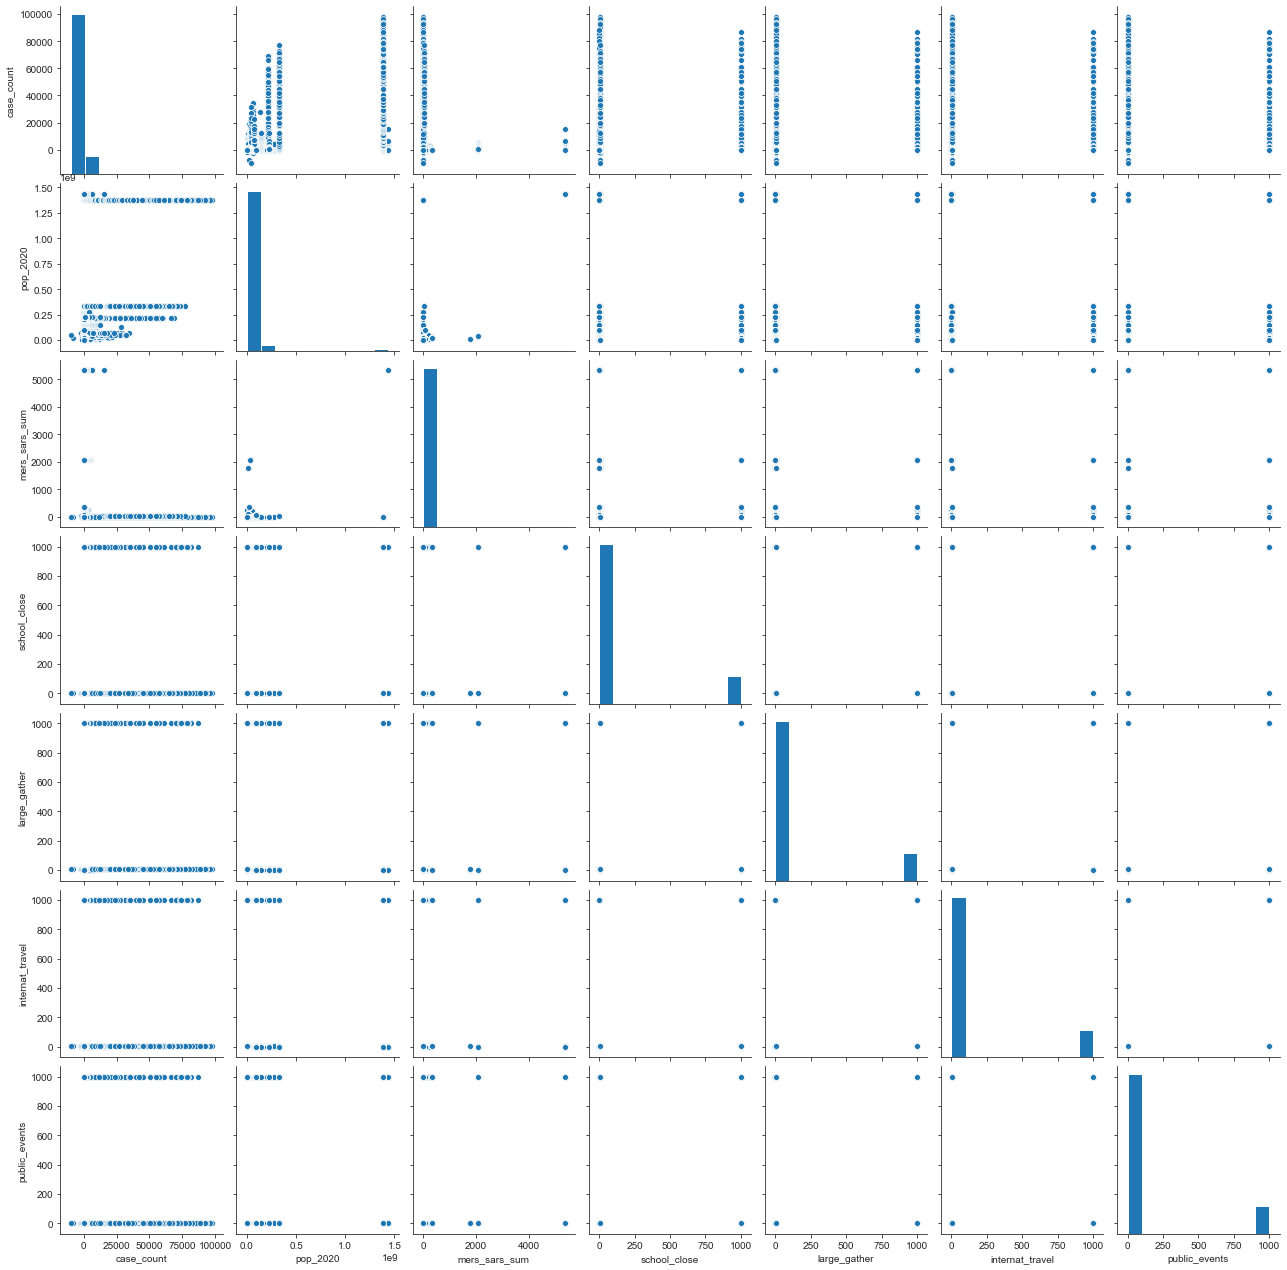

In [120]:
sns.set_style('ticks')
sns.pairplot(df, vars= ['case_count','pop_2020', 'mers_sars_sum','school_close','large_gather','internat_travel','public_events'])

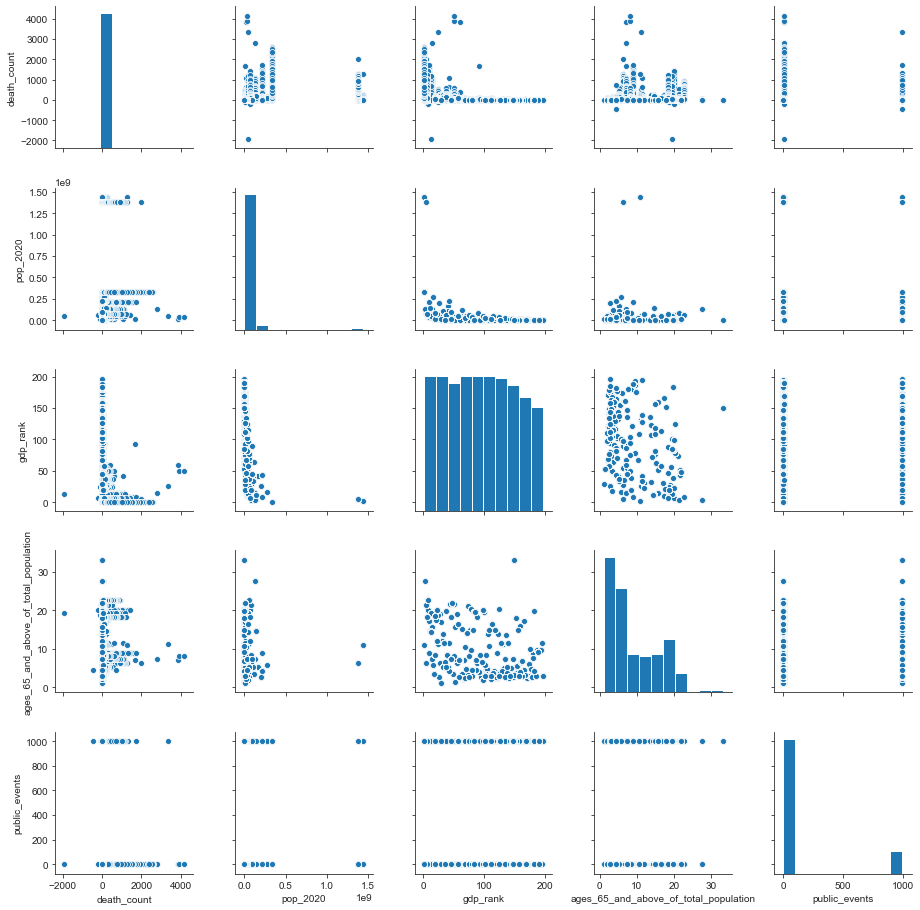

In [121]:
sns.pairplot(df, vars= ['death_count','pop_2020', 'gdp_rank','ages_65_and_above_of_total_population','public_events'])

>## Distribution Analysis

Text(0.5, 0, 'Case Counts')

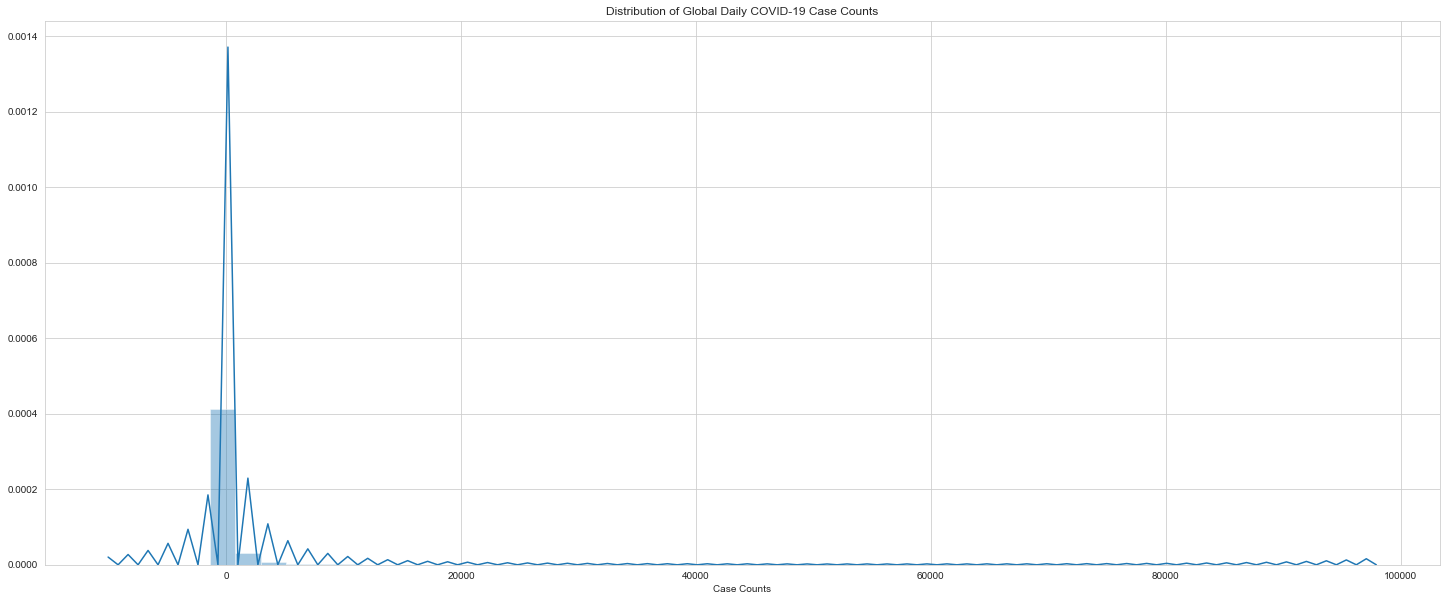

In [106]:
sns.set_style('whitegrid')
sns.distplot(df.case_count)
plt.title('Distribution of Global Daily COVID-19 Case Counts')
plt.rcParams['figure.figsize'] = (25,10) # changes plot size
plt.xlabel('Case Counts')

Text(0.5, 0, 'Case Counts')

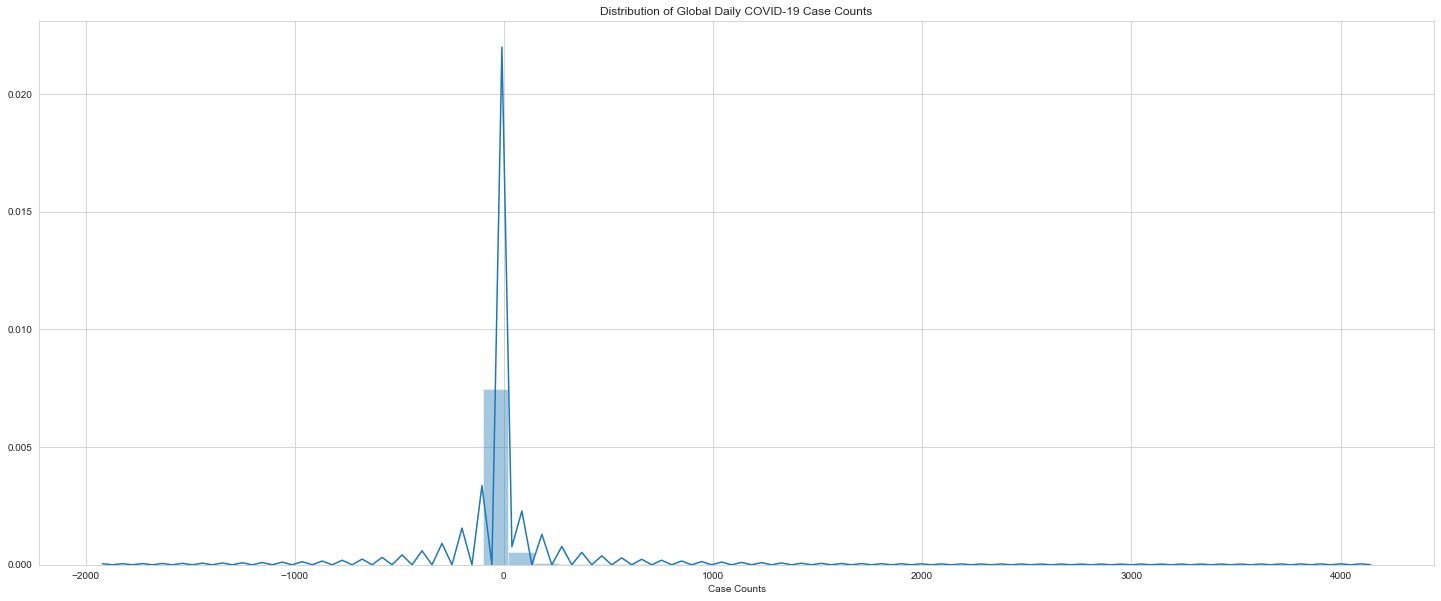

In [110]:
sns.distplot(df.death_count)
plt.title('Distribution of Global Daily COVID-19 Case Counts')
plt.rcParams['figure.figsize'] = (25,10) # changes plot size
plt.xlabel('Case Counts')

# Modeling Analysis

>> Model specification

\begin{equation}
\tag{2.13}
stack.loss_i = \alpha_n + \beta air_i + e_i, \text{ where } e_i \sim \text{N}(0,\sigma^2) 
\end{equation}

\begin{equation}
\tag{2.7}
\begin{bmatrix}stack.loss_1\\stack.loss_2\\stack.loss_3\\stack.loss_4\end{bmatrix}
= 
\begin{bmatrix}
\alpha&\beta&0&0&0\\
\alpha&0&\beta&0&0\\
\alpha&0&0&\beta&0\\
\alpha&0&0&0&\beta
\end{bmatrix}
\begin{bmatrix}1\\air_1\\air_2\\air_3\\air_4\end{bmatrix}
+
\begin{bmatrix}e_1\\e_2\\e_3\\e_4\end{bmatrix}
\end{equation}

\[\begin{equation}\tag{2.7}\begin{bmatrix}stack.loss_1\\stack.loss_2\\stack.loss_3\\stack.loss_4\end{bmatrix}=\begin{bmatrix}\alpha&\beta&0&0&0\\ \alpha&0&\beta&0&0\\ \alpha&0&0&\beta&0\\ \alpha&0&0&0&\beta\end{bmatrix}
\end{equation}]